# Series
**Series是pandas的一种存储结构，一维数组，它可以包含任何数据类型的标签。我们主要使用它们来处理时间序列数据**

## 创建series Series([ ])

**创建一个series,获取series的名称和索引**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)
print(s.name)
print(s.index)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64
None
RangeIndex(start=0, stop=5, step=1)


**添加名称，修改索引**

In [3]:
s.name = "Price Series"
print("series name:",s.name)
new_index = pd.date_range("20160101",periods=len(s), freq="D")
s.index = new_index
print("new index:",s.index)
print (s)

series name: Price Series
new index: DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')
2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Price Series, dtype: float64


## 访问序列元素

系列的访问通常使用 **iloc[ ]** 和 **loc[ ]** 的方法。我们使用iloc[]来访问元素的整数索引和我们使用loc[]来访问序列的索引


### iloc
**访问单个整数索引**

In [4]:
print (s)
print("First element of the series: ", s.iloc[0])
print("Last element of the series: ", s.iloc[len(s)-1])

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Price Series, dtype: float64
First element of the series:  1.0
Last element of the series:  5.0


### #iloc
**访问范围的整数索引，从0到5，间隔2**

In [5]:
print (s)
print(s.iloc[0:5:2])

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Price Series, dtype: float64
2016-01-01    1.0
2016-01-03    NaN
2016-01-05    5.0
Freq: 2D, Name: Price Series, dtype: float64


### #loc
**访问单个与范围的序列**

In [6]:
print (s)
print(s.loc['20160101'])
print(s.loc['20160102':'20160104'])

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Price Series, dtype: float64
1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Price Series, dtype: float64


### 布尔索引

除了上述访问方法,您可以使用布尔过滤序列数组。比较序列与标准是否一致。当与您设定的任何条件相比,这次你返回另一个序列中,回填满了布尔值。

In [7]:
print (s)
print(s < 3)
print(s.loc[s < 3])
print(s.loc[(s < 3) & (s > 1)])

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Price Series, dtype: float64
2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Price Series, dtype: bool
2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Price Series, dtype: float64
2016-01-02    2.0
Freq: D, Name: Price Series, dtype: float64


缺失数据
当我们处理实际数据,有一个非常现实的遭遇缺失值的可能性。pandas提供我们处理它们的方法，我们有两个处理缺失数据的主要手段，一个是fillna,另一个是dropna。

### 使用Series处理时间序列

**读取excel数据并进行抽样resample()**

In [8]:
import pandas as pd

data = pd.read_excel('sz50.xlsx', sheetname=0, index_col='datetime')
print(data)

                      close    high     low    open    volume
datetime                                                     
2017-01-03 15:00:00  115.99  117.06  115.14  115.43  16232125
2017-01-04 15:00:00  116.28  116.42  115.21  115.99  29656234
2017-01-05 15:00:00  116.07  116.64  115.64  116.07  26436646
2017-01-06 15:00:00  115.21  116.07  114.86  116.07  17195598
2017-01-09 15:00:00  115.35  115.99  114.86  115.64  14908745
2017-01-10 15:00:00  115.28  115.64  114.93  115.21   7996636
2017-01-11 15:00:00  115.07  115.64  115.00  115.64   9166532
2017-01-12 15:00:00  114.78  115.35  114.71  115.21   8295650
2017-01-13 15:00:00  115.85  115.99  114.64  114.64  19024943
2017-01-16 15:00:00  117.92  118.20  114.64  115.57  53249124
2017-01-17 15:00:00  116.85  117.77  116.56  117.21  12555292
2017-01-18 15:00:00  117.42  117.85  116.49  116.92  11478663
2017-01-19 15:00:00  117.77  118.49  116.99  116.99  12180687
2017-01-20 15:00:00  118.06  118.63  117.49  118.06  14285968
2017-01-

#只保留data中的close，获取data的数据类型与前5个值：

In [9]:
Series = data.close

In [10]:
Series.head()

datetime
2017-01-03 15:00:00    115.99
2017-01-04 15:00:00    116.28
2017-01-05 15:00:00    116.07
2017-01-06 15:00:00    115.21
2017-01-09 15:00:00    115.35
Name: close, dtype: float64

用resample给每个月的最后一天抽样。

In [11]:
monthly_prices = Series.resample('M').last()
print(monthly_prices.head(5))

datetime
2017-01-31    119.41
2017-02-28    118.06
2017-03-31    114.00
2017-04-30    108.30
2017-05-31    120.37
Freq: M, Name: close, dtype: float64


In [12]:
monthly_prices_med = Series.resample('M').median()
monthly_prices_med.head(5)

datetime
2017-01-31    116.565
2017-02-28    118.985
2017-03-31    115.500
2017-04-30    109.800
2017-05-31    107.700
Freq: M, Name: close, dtype: float64

### 缺失数据处理

**当我们处理实际数据,有一个非常现实的遭遇缺失值的可能性。pandas提供我们处理它们的方法，我们有两个处理缺失数据的主要手段，一个是fillna,另一个是dropna。**

In [13]:
from datetime import datetime
data_s= Series.loc[datetime(2017,1,1):datetime(2017,1,10)]
data_r=data_s.resample('D').mean() #插入每一天
print(data_r.head(10))

datetime
2017-01-03    115.99
2017-01-04    116.28
2017-01-05    116.07
2017-01-06    115.21
2017-01-07       NaN
2017-01-08       NaN
2017-01-09    115.35
Freq: D, Name: close, dtype: float64


**填写缺失的数据 fillna()**

In [14]:
print(data_r.head(10).fillna(method='ffill'))  #填写缺失的天为前一天的价格。

datetime
2017-01-03    115.99
2017-01-04    116.28
2017-01-05    116.07
2017-01-06    115.21
2017-01-07    115.21
2017-01-08    115.21
2017-01-09    115.35
Freq: D, Name: close, dtype: float64


**使用dropna()方法删除缺失值**

In [15]:
print(data_r.head(10).dropna())

datetime
2017-01-03    115.99
2017-01-04    116.28
2017-01-05    116.07
2017-01-06    115.21
2017-01-09    115.35
Name: close, dtype: float64


### 用pandas做时间序列分析

**让我们对最初的价格做一些基本的时间序列分析。每个Pandas的series都有一个内置命令绘制方法。**

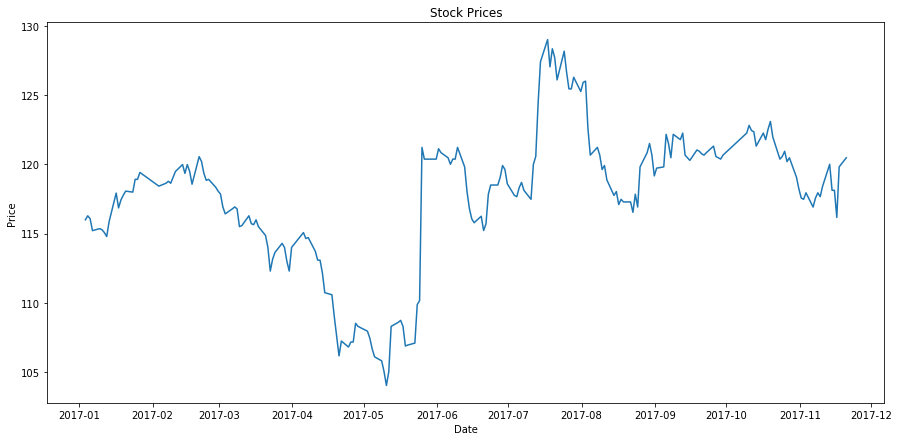

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(Series)
plt.title("Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

# print("Mean: ", data.mean())
# print("Standard deviation: ", data.std())
# print("Summary Statistics", data.describe())

datetime
2017-01-03 15:00:00         NaN
2017-01-04 15:00:00    0.002500
2017-01-05 15:00:00   -0.001806
2017-01-06 15:00:00   -0.007409
2017-01-09 15:00:00    0.001215
Name: close, dtype: float64


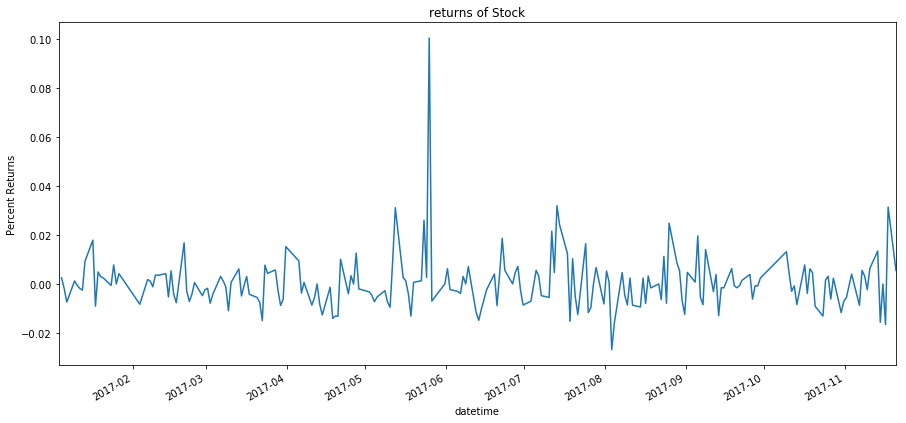

In [17]:
mult_returns = Series.pct_change()
print(mult_returns.head())
plt.figure(figsize=(15, 7))
plt.title("returns of Stock")
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot()
plt.show()

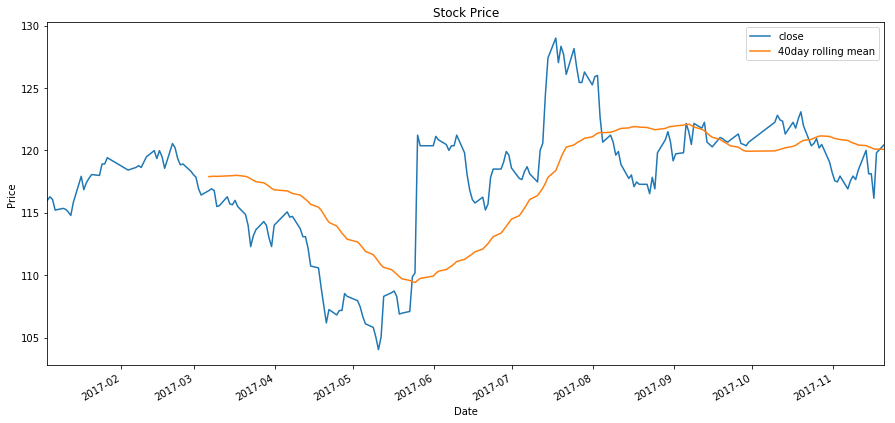

In [18]:
rolling_mean = Series.rolling(window=40).mean()
rolling_mean.name = "40day rolling mean"

plt.figure(figsize=(15, 7))
Series.plot()
rolling_mean.plot()
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

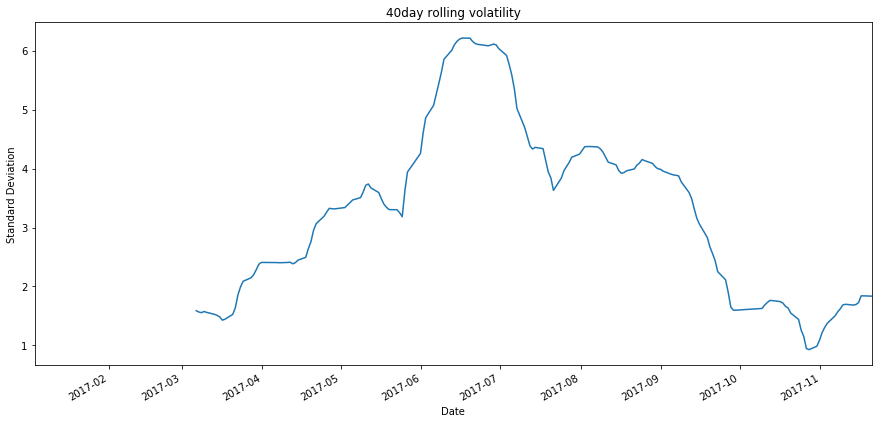

In [19]:
rolling_std = Series.rolling(window=40).std()
rolling_std.name = "40day rolling volatility"

plt.figure(figsize=(15, 7))
rolling_std.plot()
plt.title(rolling_std.name)
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.show()